<a href="https://colab.research.google.com/github/Alexandre77777/data_mining/blob/main/1.%20%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0/2.%20%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Практика Pandas

1. Скачайте этот блокнот к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература
- [**Блокнот с теорией**](https://colab.research.google.com/github/Alexandre77777/data_mining/blob/main/1.%20%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5/%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F/2.%20%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F_Pandas.ipynb)
- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
%matplotlib inline
import pandas as pd
pd.__version__

'2.1.1'

In [2]:
import numpy as np

Если вы увидели warning, не переживайте, всё хорошо.
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [68]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values=' ?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1) Выведите последние 10 элеметнов датасета

In [7]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


2) Сколько колонок и сколько строк в этом датасете?

In [8]:
print(f'Количество колонок: {df.shape[1]}\nКоличество строк: {df.shape[0]}')

Количество колонок: 15
Количество строк: 32561


3) Какие типы данных у элементов этого датасета?

In [9]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

4) Какие признаки имеют пропуски?

Пропусками считаются следующие значения:
- `NaN`
- `None`

5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Ошибки могут позникать по многим причинам:
- Сбор:
    - Не были предусмотрены все пограничные условия. К примеру, при сборе данных о погоде не было предусмотрено хранение отрицательных значений температур. Или в случае с записью общего состояния за окном (ясно, облачно) не был предусмотрен вариант "туман". 
    - Изменились условия в процессе получения данных. Особенно в случае, если данные собираются в течение длительного промежутка времени. К примеру, в веб-сайте, с которого производится парсинг данных, незначительно поменялась разметка. Недостаточно сильно, чтобы парсер перестал работать, но достаточно для того, чтобы в собираемых данных начали встречаться ошибки;
    - Аппаратно/программные ошибки в процессе сбора данныхю. Ошибки записи данных на постоянное хранилище. К примеру: в программе не было предусмотрено возникновение неполадок на железном уровне. В таком случае может произойти много чего: 
        - Программа не сможет вернуть прежнее состояние;
        - Могут потеряться (или записаться с искажением) данные, запись которых производилась непосредственно в момент отключения компьютераж
        - Проблемы сетевого характера (банально может отключиться интернет)
- Обработка:
    - Был выбран неподходящий тип данных для хранения значений. К примеру, не были предусмотрены все `enum` значения для описания поля. Или для записи чисел с плавающей запятой был использован `int`;
    - Ошибка программиста при парсинге данных (если таковой требуется) - накосячили с regex-ом, xpath-ом и т.п...


Ваш ответ:

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [10]:
set(df['workclass'])

{' Federal-gov',
 ' Local-gov',
 ' Never-worked',
 ' Private',
 ' Self-emp-inc',
 ' Self-emp-not-inc',
 ' State-gov',
 ' Without-pay',
 nan}

7) Какой средний возраст женщин и мужчин?

In [11]:
np.average(df['age'])

38.58164675532078

8) Постройте гистограмму(bar) распределения образования людей (education)

<Axes: xlabel='education'>

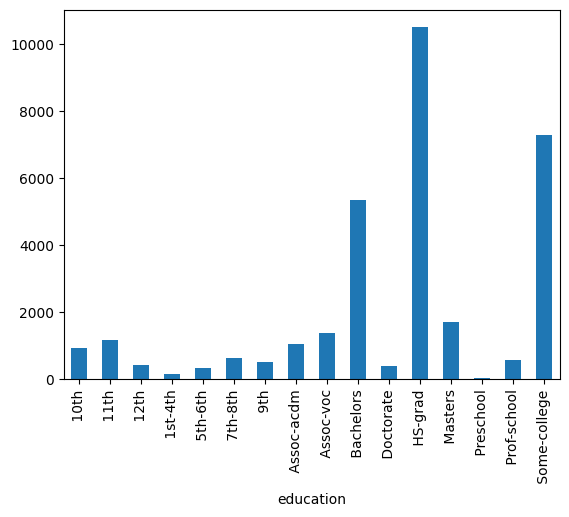

In [12]:
df.groupby('education').count()['age'].plot(kind='bar')

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак income) и тех, кто получает менее 50K в год?

In [13]:
set(df['income'])

{' <=50K', ' >50K'}

In [14]:
ages = df[df['income'] == ' >50K']['age']

print(f'Среднее: {ages.mean()}\nСреднеквадратичные отклонения: {ages.std()}')

Среднее: 44.24984058155847
Среднеквадратичные отклонения: 10.519027719851826


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [15]:
set(df['education'])

{' 10th',
 ' 11th',
 ' 12th',
 ' 1st-4th',
 ' 5th-6th',
 ' 7th-8th',
 ' 9th',
 ' Assoc-acdm',
 ' Assoc-voc',
 ' Bachelors',
 ' Doctorate',
 ' HS-grad',
 ' Masters',
 ' Preschool',
 ' Prof-school',
 ' Some-college'}

In [16]:
requested_educations = [
    ' Bachelors',  
    ' Prof-school', 
    ' Assoc-acdm', 
    ' Assoc-voc', 
    ' Masters',
    ' Doctorate'
]

result = df[df['income'] == ' >50K']['education'].apply(lambda x: x not in requested_educations).any()

if result:
    print('Нет. Есть люди, у которых отсутствует одно из приведенных выше степеней образования')
else:
    print('Да. Все люди имеют одно из приведенных образований')

Нет. Есть люди, у которых отсутствует одно из приведенных выше степеней образования


11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [21]:
set(df['marital.status'])

0              Never-married
1         Married-civ-spouse
2                   Divorced
3         Married-civ-spouse
4         Married-civ-spouse
                ...         
32556     Married-civ-spouse
32557     Married-civ-spouse
32558                Widowed
32559          Never-married
32560     Married-civ-spouse
Name: marital.status, Length: 32561, dtype: object

In [47]:
rich_ones = df[
    (df['income'] == ' >50K') & 
    (df['sex'] == ' Male')
]['marital.status'].apply(lambda x: str(x))

married_count = rich_ones[rich_ones.str.startswith(' Married')].count()
non_married_count = rich_ones.count() - married_count
rich_ones_count = rich_ones.count()

married_perc = married_count / rich_ones_count
non_married_perc = (rich_ones_count - married_count)  / rich_ones_count

if married_perc > non_married_perc:
    print(f'Женатых больше ({married_perc:.2f} > {non_married_perc:.2f})')
else:
    print(f'Холостых больше ({non_married_perc:.2f} > {married_perc:.2f})')

Женатых больше (0.90 > 0.10)


12) Постройте [сводную таблицу](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) для отображения зависимостей среднего времени работы (hours.per.week) с доходом (income) для каждой страны (native.country).  


> Пример фрагмента таблицы:



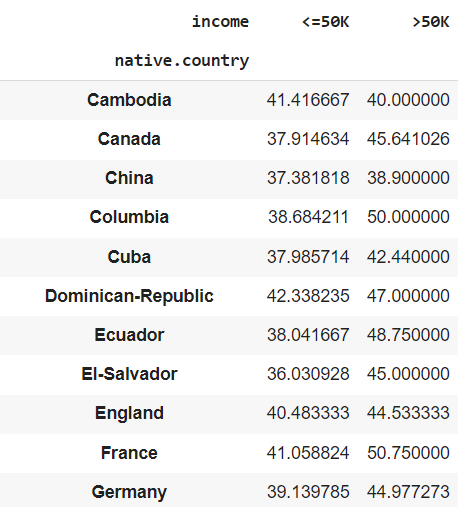

In [55]:
pd.crosstab(index=df['native.country'], values=df['hours.per.week'], columns=df['income'], aggfunc='mean')

income,<=50K,>50K
native.country,,
Cambodia,41.416667,40.000000
Canada,37.914634,45.641026
China,37.381818,38.900000
Columbia,38.684211,50.000000
Cuba,37.985714,42.440000
Dominican-Republic,42.338235,47.000000
Ecuador,38.041667,48.750000
El-Salvador,36.030928,45.000000
England,40.483333,44.533333


13) Постройте сводную таблицу для сравнения уровня образования и разности между capital.gain и capital.loss по следующему алгоритму:&nbsp;  
1. Создайте вспомогательную таблицу (датафрейм) и добавьте в неё столбец "education" из целевой таблицы
2. Добавьте во вспомогательную таблицу ещё один столбец "capital.diff", значиниями которого будут являться разности столбцов capital.gain и capital.loss целевой таблицы
3. Удалите во вспомогательной таблице все строки, в которых значение столбца "capital.diff" равно нулю  
&nbsp; Подсказка:
```
summary_table = summary_table[summary_table['capital.diff'] != 0 ]
```
4. Для набора значений из столбца "capital.diff", необходимо сформировать 10 категорий (кластеров), это можно сделать с помощью математических функций, типа log, извлечение корня N-ой степени и округления, для последующего перехода к категориальным признакам.  
  * В нашем случае, можно воспользоваться методом [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html) и равномерно разделить наш набор данных на целевое количество категорий
5. Добавьте во вспомогательную таблицу столбец "categories", и проинициализируйте его значениями категорий, которые возвращает метод pd.qcut()  
&nbsp; Пример:
```
summary_table['categories'] = pd.qcut(summary_table["capital.diff"], q = 10)

6. Постройте сводную таблицу с помощью метода pivot_table(),

Примерная структура таблицы (в качестве значений выводится количество людей, относящихся к той или иной группе):

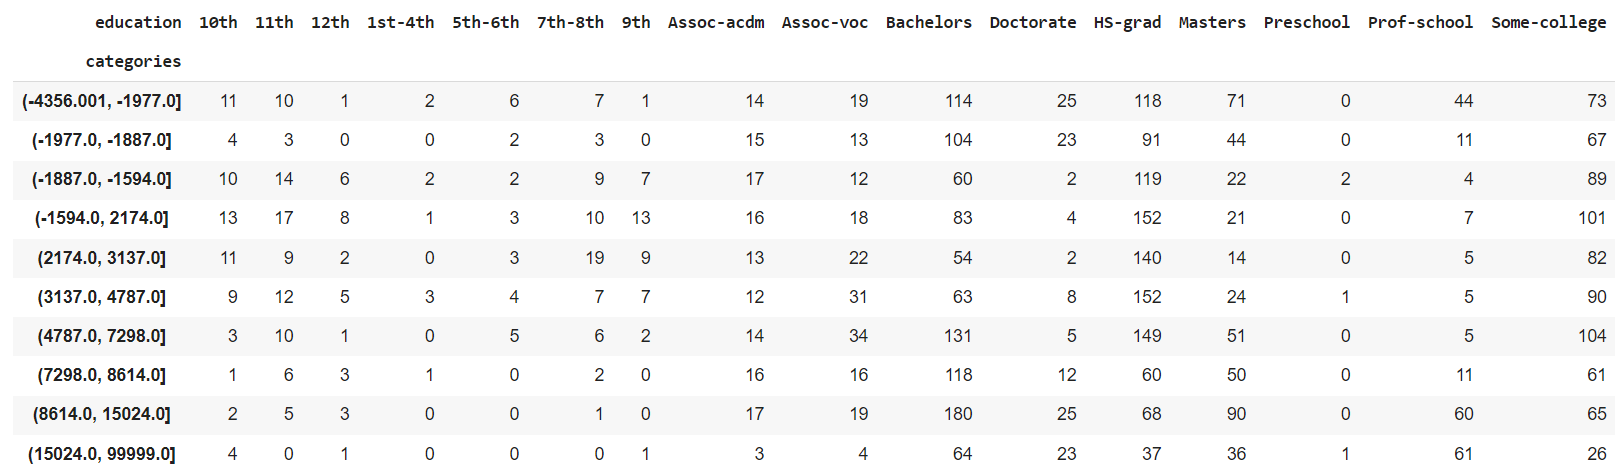

In [84]:
st = df[['education']].copy()

st['capital.diff'] = df['capital.gain'] - df['capital.loss']
st = st[st['capital.diff'] != 0]
st['categories'] = pd.qcut(st['capital.diff'], q=10)

pd.pivot_table(
    data=st,
    index='education',
    columns='categories',
    values='capital.diff',
    aggfunc='count'
)

categories,"(-4356.001, -1977.0]","(-1977.0, -1887.0]","(-1887.0, -1594.0]","(-1594.0, 2174.0]","(2174.0, 3137.0]","(3137.0, 4787.0]","(4787.0, 7298.0]","(7298.0, 8614.0]","(8614.0, 15024.0]","(15024.0, 99999.0]"
education,,,,,,,,,,
10th,11,4,10,13,11,9,3,1,2,4
11th,10,3,14,17,9,12,10,6,5,0
12th,1,0,6,8,2,5,1,3,3,1
1st-4th,2,0,2,1,0,3,0,1,0,0
5th-6th,6,2,2,3,3,4,5,0,0,0
7th-8th,7,3,9,10,19,7,6,2,1,0
9th,1,0,7,13,9,7,2,0,0,1
Assoc-acdm,14,15,17,16,13,12,14,16,17,3
Assoc-voc,19,13,12,18,22,31,34,16,19,4


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [89]:
rich_ones = df[(df['sex'] == ' Female') & (df['income'] == ' >50K')]['native.country'].value_counts()

most_riches = rich_ones.idxmax()
most_riches_values = rich_ones.max()

print(f'Больше всего женщин с доходом более >50K: {most_riches}')
print(f'Количество: {most_riches_values}')

Больше всего женщин с доходом более >50K:  United-States
Количество: 1072


15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [94]:
st = df.copy()
st['magic_salary'] = np.where(st['income'] == ' >50K', np.random.randint(51, 201), np.random.randint(0, 51))
avg_salary = st.groupby('education')['magic_salary'].mean()

print(f'Средняя ЗП в зависимости от уровня образования: {avg_salary}')

Средняя ЗП в зависимости от уровня образования: education
 10th            10.509110
 11th             8.770213
 12th            11.612009
 1st-4th          7.035714
 5th-6th          8.429429
 7th-8th          9.996904
 9th              8.935798
 Assoc-acdm      31.064667
 Assoc-voc       32.517366
 Bachelors       49.867040
 Doctorate       86.723971
 HS-grad         21.024474
 Masters         65.894370
 Preschool        3.000000
 Prof-school     85.984375
 Some-college    24.496503
Name: magic_salary, dtype: float64
